In [72]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [73]:
path =r'/Users/hauptjoh/.kaggle/datasets/sudalairajkumar/cryptocurrencypricehistory' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for i in range(len(allFiles)):
    df = pd.read_csv(allFiles[i],index_col=None, header=0)
    df.index = df.Date
    list_.append(df[["Close"]].set_axis(axis = 1, labels = ["Close"+str(i)], inplace = False))
frame = pd.concat(list_, axis = 1)

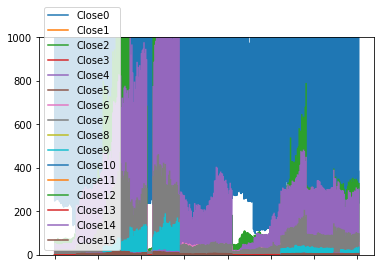

In [74]:
frame.plot(ylim = [0,1000])

In [75]:
frame

,Close0,Close1,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,Close10,Close11,Close12,Close13,Close14,Close15
"Apr 01, 2014",478.38,NaN,0.724105,NaN,NaN,NaN,13.13,NaN,NaN,NaN,NaN,NaN,NaN,0.008757,NaN,NaN
"Apr 01, 2015",247.27,NaN,3.830000,NaN,NaN,NaN,1.66,1.010000,0.000242,NaN,NaN,NaN,NaN,0.007668,NaN,NaN
"Apr 01, 2016",417.96,NaN,7.070000,NaN,11.660000,NaN,3.24,1.460000,0.001473,NaN,NaN,NaN,NaN,0.007418,NaN,NaN
"Apr 01, 2017",1080.50,4.01,68.600000,2.76,50.700000,NaN,6.88,21.500000,0.017632,0.205017,NaN,NaN,NaN,0.021892,0.246560,0.350208
"Apr 02, 2014",437.14,NaN,0.615044,NaN,NaN,NaN,11.29,NaN,NaN,NaN,NaN,NaN,NaN,0.007922,NaN,NaN
"Apr 02, 2015",253.00,NaN,4.540000,NaN,NaN,NaN,1.68,0.969260,0.000314,NaN,NaN,NaN,NaN,0.007906,NaN,NaN
"Apr 02, 2016",420.87,NaN,7.050000,NaN,11.600000,NaN,3.26,1.550000,0.001443,NaN,NaN,NaN,NaN,0.007501,NaN,NaN
"Apr 02, 2017",1102.17,3.91,57.070000,2.64,48.750000,NaN,7.74,20.140000,0.016086,0.205480,NaN,NaN,NaN,0.061159,0.276256,0.344632
"Apr 03, 2014",444.72,NaN,0.638183,NaN,NaN,NaN,11.05,NaN,NaN,NaN,NaN,NaN,NaN,0.007944,NaN,NaN
"Apr 03, 2015",254.32,NaN,4.360000,NaN,NaN,NaN,1.70,0.952245,0.000310,NaN,NaN,NaN,NaN,0.008720,NaN,NaN


In [56]:
nb_coins = frame.shape[1]-1 # 16 coins for comparison
frame.shape

(1760, 16)

In [64]:
X = frame.shift(1)

In [69]:
X_train = np.array(X['20170101':'20171231'])
y_train = np.array(frame['20170101':'20171231'])

X_test = np.array(X['20180101':])
y_test = np.array(frame['20180101':])

In [70]:
from keras import Sequential
from keras.layers import LSTM, Dense

In [71]:
coinnet = Sequential()
coinnet = LSTM(20, activation = "tanh",  dropout = 0.)
coinnet = Dense(nb_coins) # Predict all coins simultanously